# Formative 2- Data Preprocessing Assignment for Machine Learning Pipeline

## Part 1: Data Augmentation on CSV Files

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading data and checking for missing values
data = pd.read_csv('/content/drive/MyDrive/customer_transactions.csv')
data.isnull().sum()

,0
customer_id_legacy,0
transaction_id,0
purchase_amount,0
purchase_date,0
product_category,0
customer_rating,10


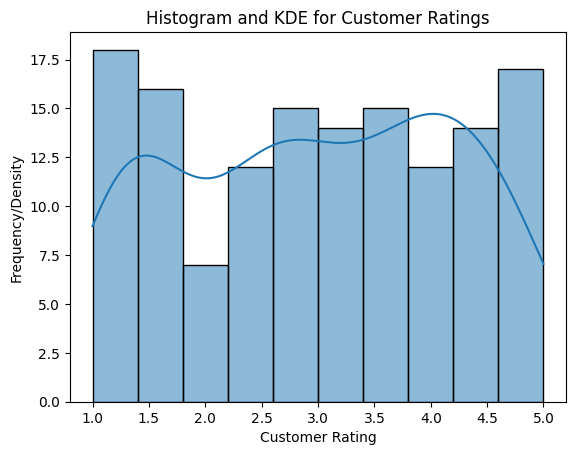

In [ ]:
sns.histplot(data['customer_rating'], kde=True, bins=10)
plt.title('Histogram and KDE for Customer Ratings')
plt.xlabel('Customer Rating')
plt.ylabel('Frequency/Density')
plt.show()

The distribution of customer ratings seems to be uneven, therefore I am choosing to impute the data using median instead of mean. Reason being that the mean could be affected by the peaks and dips in the column.

In [ ]:
median = data['customer_rating'].median()
data.fillna({'customer_rating': median}, inplace=True)
print(data.isnull().sum())

customer_id_legacy    0
transaction_id        0
purchase_amount       0
purchase_date         0
product_category      0
customer_rating       0
dtype: int64


In [ ]:
data.head()

,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,151,1001,408,2024-01-01,Sports,2.3
1,192,1002,332,2024-01-02,Electronics,4.2
2,114,1003,442,2024-01-03,Electronics,2.1
3,171,1004,256,2024-01-04,Clothing,2.8
4,160,1005,64,2024-01-05,Clothing,1.3


In [ ]:
#---------- Add random noise to the 'purchase_amount' column-------
noise = np.random.normal(0, 10, size=len(data))
data['purchase_amount'] += noise

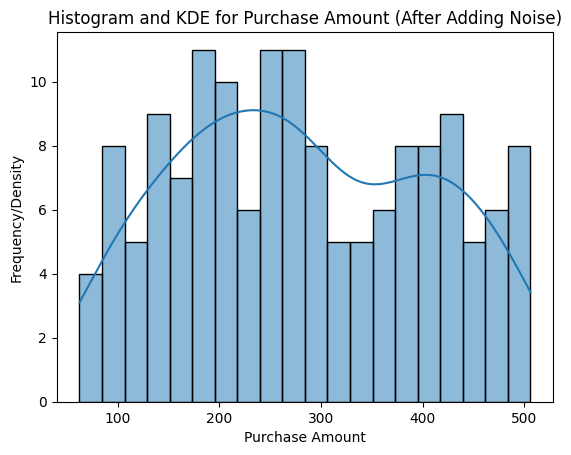

In [ ]:
#-------- Check the updated distribution of 'purchase_amount'-----
sns.histplot(data['purchase_amount'], kde=True, bins=20)
plt.title('Histogram and KDE for Purchase Amount (After Adding Noise)')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency/Density')
plt.show()

Skewness of Numerical Columns:
customer_id_legacy   -0.087318
transaction_id        0.000000
purchase_amount       0.102745
customer_rating      -0.081501
dtype: float64


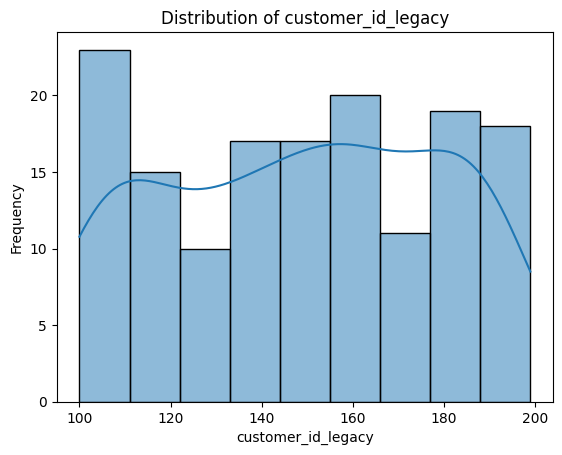

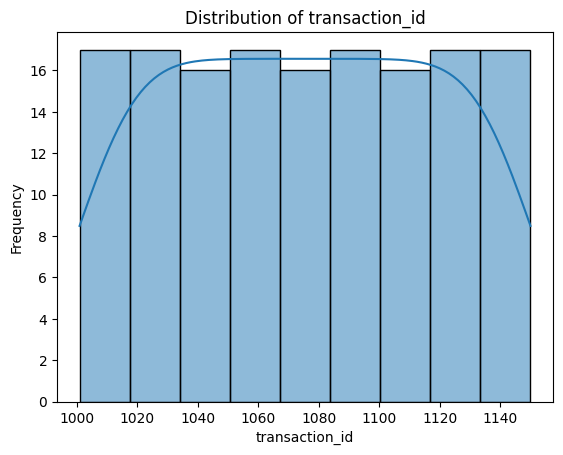

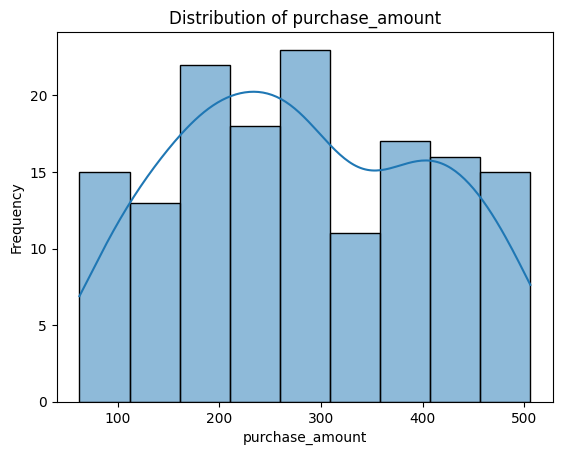

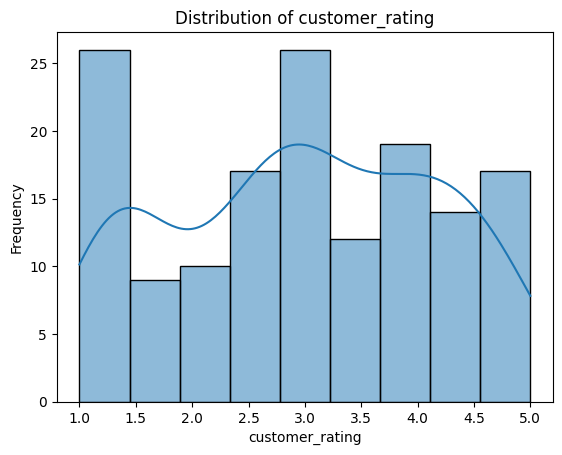

In [ ]:
# ---Calculate skewness for numerical columns
skewness = data.select_dtypes(include=['float64', 'int64']).skew()
print("Skewness of Numerical Columns:")
print(skewness)

# ---Visualize the distribution of skewed columns---
import matplotlib.pyplot as plt
import seaborn as sns

for col in data.select_dtypes(include=['float64', 'int64']).columns:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# ---Sample 10% of the data to create synthetic transactions---
new_transactions = data.sample(frac=0.1).copy()

#--- Modify the 'purchase_amount'---
new_transactions['purchase_amount'] *= np.random.uniform(0.9, 1.1, size=len(new_transactions))

#--- Append the synthetic transactions to the original dataset---
data = pd.concat([data, new_transactions], ignore_index=True)

# ------------Check the size of the augmented dataset---------------------
print(f"Augmented dataset size: {len(data)}")

Augmented dataset size: 165


In [ ]:
#--- Export the augmented dataset----
data.to_csv('/content/drive/MyDrive/customer_transactions_augmented.csv', index=False)
print("Augmented dataset exported successfully.")

Augmented dataset exported successfully.


# Part 2: Merging Datasets with Transitive Properties

### Objective: Merge two different datasets with shared but indirect relationships between entities.

In [ ]:
# ------Load the datasets----//
transactions = pd.read_csv('/content/drive/MyDrive/customer_transactions_augmented.csv')
social_profiles = pd.read_csv('/content/drive/MyDrive/customer_social_profiles.csv')
id_mapping = pd.read_csv('/content/drive/MyDrive/id_mapping.csv')

In [ ]:
# ----------------------------Display the first few rows of each dataset---------//
print("Transactions Dataset:")
print(transactions.head())

print("\nSocial Profiles Dataset:")
print(social_profiles.head())

print("\nID Mapping Dataset:")
print(id_mapping.head())

Transactions Dataset:
   customer_id_legacy  transaction_id  purchase_amount purchase_date  \
0                 151            1001       417.425085    2024-01-01   
1                 192            1002       334.768285    2024-01-02   
2                 114            1003       459.888098    2024-01-03   
3                 171            1004       259.806359    2024-01-04   
4                 160            1005        62.576279    2024-01-05   

  product_category  customer_rating  
0           Sports              2.3  
1      Electronics              4.2  
2      Electronics              2.1  
3         Clothing              2.8  
4         Clothing              1.3  

Social Profiles Dataset:
  customer_id_new social_media_platform  engagement_score  \
0            A178              LinkedIn                74   
1            A190               Twitter                82   
2            A150              Facebook                96   
3            A162               Twitter        

In [ ]:
# ------Merge transactions with id_mapping to get customer_id_new---//
merged_transactions = pd.merge(
    transactions,
    id_mapping,
    on='customer_id_legacy',
    how='left'
)

# ------Merge with social_profiles to get the final dataset----//
final_data = pd.merge(
    merged_transactions,
    social_profiles,
    on='customer_id_new',
    how='inner'
)

In [ ]:
# Display the merged dataset
print("Merged Dataset:")
print(final_data.head())

Merged Dataset:
   customer_id_legacy  transaction_id  purchase_amount purchase_date  \
0                 151            1001       417.425085    2024-01-01   
1                 192            1002       334.768285    2024-01-02   
2                 192            1002       334.768285    2024-01-02   
3                 182            1007        92.925845    2024-01-07   
4                 186            1008       432.796916    2024-01-08   

  product_category  customer_rating customer_id_new social_media_platform  \
0           Sports              2.3            A176              Facebook   
1      Electronics              4.2            A156             Instagram   
2      Electronics              4.2            A140              LinkedIn   
3           Sports              4.9            A193                TikTok   
4         Clothing              4.3            A160                TikTok   

   engagement_score  purchase_interest_score review_sentiment  
0                70     

In [ ]:
# ---Print column names in the final_data DataFrame----//
print(final_data.columns)

Index(['customer_id_legacy', 'transaction_id', 'purchase_amount',
       'purchase_date', 'product_category', 'customer_rating',
       'customer_id_new', 'social_media_platform', 'engagement_score',
       'purchase_interest_score', 'review_sentiment'],
      dtype='object')


In [ ]:
# ---Check for duplicate customer_id_legacy; one-to-many mappings---
duplicate_customers = final_data[final_data.duplicated('customer_id_legacy', keep=False)]
print("Duplicate Customers (One-to-Many Mappings):")
print(duplicate_customers)

# ----Group by customer_id_legacy and aggregate numerical columns---
final_data_aggregated = final_data.groupby('customer_id_legacy').agg({
    'purchase_amount': 'sum',
    'customer_rating': 'mean',
    'engagement_score': 'mean',
    'purchase_interest_score': 'mean',
    'transaction_id': 'count',
    'product_category': lambda x: x.mode()[0],
    'social_media_platform': lambda x: x.nunique(),
    'review_sentiment': lambda x: x.mode()[0]
}).reset_index()

Duplicate Customers (One-to-Many Mappings):
     customer_id_legacy  transaction_id  purchase_amount purchase_date  \
1                   192            1002       334.768285    2024-01-02   
2                   192            1002       334.768285    2024-01-02   
4                   186            1008       432.796916    2024-01-08   
5                   186            1008       432.796916    2024-01-08   
6                   186            1008       432.796916    2024-01-08   
..                  ...             ...              ...           ...   
318                 106            1047       417.663419    2024-02-16   
319                 106            1047       417.663419    2024-02-16   
320                 152            1058       322.673802    2024-02-27   
321                 152            1058       322.673802    2024-02-27   
322                 152            1058       322.673802    2024-02-27   

    product_category  customer_rating customer_id_new social_media_

In [ ]:
# ---Display the aggregated dataset---
print("Aggregated Dataset:")
print(final_data_aggregated.head())

Aggregated Dataset:
   customer_id_legacy  purchase_amount  customer_rating  engagement_score  \
0                 101      5088.822804            2.525         81.800000   
1                 103       798.805935            4.200         89.000000   
2                 104       707.463899            1.450         60.000000   
3                 105       847.808462            1.500         80.333333   
4                 106      3191.413771            2.300         73.333333   

   purchase_interest_score  transaction_id product_category  \
0                 2.080000              20            Books   
1                 4.000000               3           Sports   
2                 4.300000               2         Clothing   
3                 3.200000               3            Books   
4                 3.833333               9           Sports   

   social_media_platform review_sentiment  
0                      4         Negative  
1                      1         Negative  
2     

# Feature engineering

In [ ]:
# Convert review_sentiment into numerical values (Positive=1, Neutral=0, Negative=-1)
sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
final_data_aggregated['sentiment_score'] = final_data_aggregated['review_sentiment'].map(sentiment_map)

# Normalize numerical features (purchase_amount, transaction_id, purchase_interest_score)
scaler = MinMaxScaler()
final_data_aggregated[['purchase_amount', 'transaction_id', 'purchase_interest_score', 'engagement_score']] = scaler.fit_transform(
    final_data_aggregated[['purchase_amount', 'transaction_id', 'purchase_interest_score', 'engagement_score']])

# Calculate Customer Engagement Score: Weighted sum of features
final_data_aggregated['customer_engagement_score'] = (
    0.4 * final_data_aggregated['purchase_amount'] +  # 40% weight to total spend
    0.2 * final_data_aggregated['transaction_id'] +  # 20% weight to number of transactions
    0.2 * final_data_aggregated['purchase_interest_score'] +  # 20% weight to purchase interest score
    0.1 * final_data_aggregated['social_media_platform'] +  # 10% weight to number of platforms
    0.1 * final_data_aggregated['sentiment_score']  # 10% weight to sentiment score
)
print(final_data_aggregated[['customer_id_legacy', 'customer_engagement_score']].head())


   customer_id_legacy  customer_engagement_score
0                 101                   0.901434
1                 103                   0.226420
2                 104                   0.426115
3                 105                   0.385433
4                 106                   0.649157


In [ ]:
# ---Convert purchase_date to datetime ---
final_data['purchase_date'] = pd.to_datetime(final_data['purchase_date'])

#-- Extract month and year from purchase_date---//
final_data['purchase_month'] = final_data['purchase_date'].dt.to_period('M')

# ---Aggregate purchase amounts by month---
monthly_purchases = final_data.groupby(['customer_id_legacy', 'purchase_month'])['purchase_amount'].sum().reset_index()
print("Monthly Purchases:")
print(monthly_purchases.head())

Monthly Purchases:
   customer_id_legacy purchase_month  purchase_amount
0                 101        2024-01      2377.639955
1                 101        2024-02      2010.293157
2                 101        2024-03       700.889692
3                 103        2024-02       421.784733
4                 103        2024-03       377.021202


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ---Apply TF-IDF to review_sentiment----
tfidf = TfidfVectorizer(max_features=10)
tfidf_features = tfidf.fit_transform(final_data['review_sentiment']).toarray()
tfidf_df = pd.DataFrame(tfidf_features, columns=[f'tfidf_{i}' for i in range(tfidf_features.shape[1])])

# ---Add TF-IDF features to the final dataset----//
final_data_aggregated = pd.concat([final_data_aggregated, tfidf_df], axis=1)

In [ ]:
# ---Export the final dataset---
final_data_aggregated.to_csv('/content/drive/MyDrive/final_customer_data_group4.csv', index=False)

In [ ]:
path = "/content/drive/MyDrive/final_customer_data_group4.csv"
df = pd.read_csv(path)

print(df.head())

   customer_id_legacy  purchase_amount  customer_rating  engagement_score  \
0               101.0         0.881362            2.525          0.684444   
1               103.0         0.124529            4.200          0.844444   
2               104.0         0.108415            1.450          0.200000   
3               105.0         0.133174            1.500          0.651852   
4               106.0         0.546626            2.300          0.496296   

   purchase_interest_score  transaction_id product_category  \
0                 0.244444        1.000000            Books   
1                 0.777778        0.105263           Sports   
2                 0.861111        0.052632         Clothing   
3                 0.555556        0.105263            Books   
4                 0.731481        0.421053           Sports   

   social_media_platform review_sentiment  sentiment_score  \
0                    4.0         Negative             -1.0   
1                    1.0         N

# Part 3: Data Consistency and Quality Checks

# Data Integrity Check

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/final_customer_data_group4.csv')

In [ ]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Duplicate found: {duplicates}")

Duplicate found: 267


In [ ]:
# Check categorical values
print("\nUnique values in categories:")
print("Purchase amount:", data['purchase_amount'].unique())
print("Engagement score:", data['engagement_score'].unique())

# Check on the nan values
print("\nMissing values:")
print(data.isnull().sum())


Unique values in categories:
Purchase amount: [0.88136178 0.12452934 0.10841504 0.13317422 0.54662633 0.09790159
 0.17130567 0.15943892 0.37759409 0.187144   0.0078874  0.16686932
 0.13618807 0.70084032 0.55730942 0.04943671 0.49770422 0.0341005
 0.33632473 0.19682997 0.069782   0.0989583  0.55527648 0.68415106
 0.05694698 0.08145522 0.05724722 1.         0.26114425 0.04568667
 0.48669547 0.20543131 0.13213129 0.63116024 0.13489788 0.01146188
 0.22311978 0.20539976 0.39347264 0.39291557 0.29629116 0.20641019
 0.         0.11704451 0.35766757 0.98205899 0.18442416 0.259752
 0.52139082 0.33976897 0.27115349 0.29750563 0.58392016        nan]
Engagement score: [0.68444444 0.84444444 0.2        0.65185185 0.4962963  1.
 0.65925926 0.75555556 0.31111111 0.42222222 0.41333333 0.61481481
 0.59555556 0.57777778 0.06666667 0.         0.62857143 0.81481481
 0.91111111 0.63809524 0.71111111 0.8        0.37777778 0.85185185
 0.46111111 0.63703704 0.55555556 0.78888889 0.58888889 0.33333333
 0.3555

In [ ]:
data_cleaned = data.dropna()

In [ ]:
data_cleaned = data.dropna(axis=1)

In [ ]:
data_filled = data.fillna(0)

In [ ]:
# Handle missing values
'df[col].method(value, inplace=True)', 'df[col].fillna(value, inplace=True)'
data['engagement_score'].fillna(data['engagement_score'].mean(), inplace=True)

<ipython-input-38-c8ba5d117392>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['engagement_score'].fillna(data['engagement_score'].mean(), inplace=True)


In [ ]:
# Check if purchase amount matches transaction id
missing_id = data[(data['purchase_amount'] != 'Unknown') & (data['transaction_id'].isna())].shape[0]
print(f"Missing transaction_id: {missing_id}")

Missing transaction_id: 270


# Statistical Summarization


Summary of numerical columns:
       purchase_amount  customer_rating  engagement_score
count       323.000000        53.000000        323.000000
mean          0.294636         3.012956          0.550713
std           0.100157         1.055793          0.086217
min           0.000000         1.100000          0.000000
25%           0.294636         2.300000          0.550713
50%           0.294636         3.000000          0.550713
75%           0.294636         3.860000          0.550713
max           1.000000         5.000000          1.000000


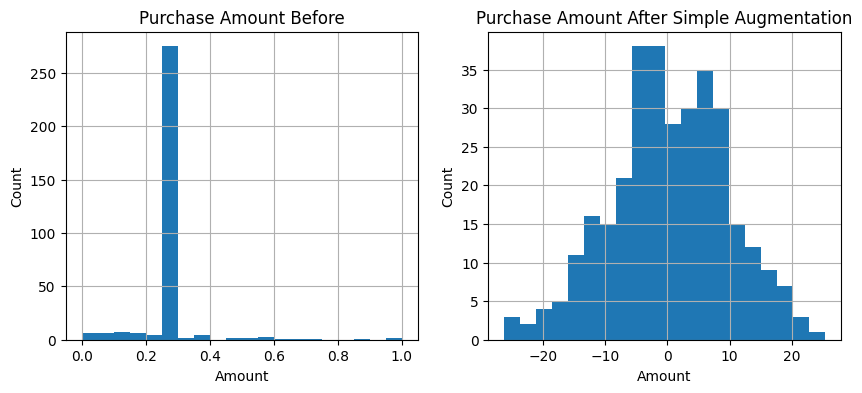

In [ ]:
# Summary of numbers
print("\nSummary of numerical columns:")
print(data[['purchase_amount', 'customer_rating', 'engagement_score']].describe())

# Plot purchase amount before and after simple augmentation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
data['purchase_amount'].hist(bins=20)
plt.title('Purchase Amount Before')
plt.xlabel('Amount')
plt.ylabel('Count')

# Add simple noise for demo
data['purchase_amount_augmented'] = data['purchase_amount'] + np.random.normal(0, 10, len(data))
plt.subplot(1, 2, 2)
data['purchase_amount_augmented'].hist(bins=20)
plt.title('Purchase Amount After Simple Augmentation')
plt.xlabel('Amount')
plt.ylabel('Count')

plt.tight_layout
plt.show()

# Feature selection for Machine Learning

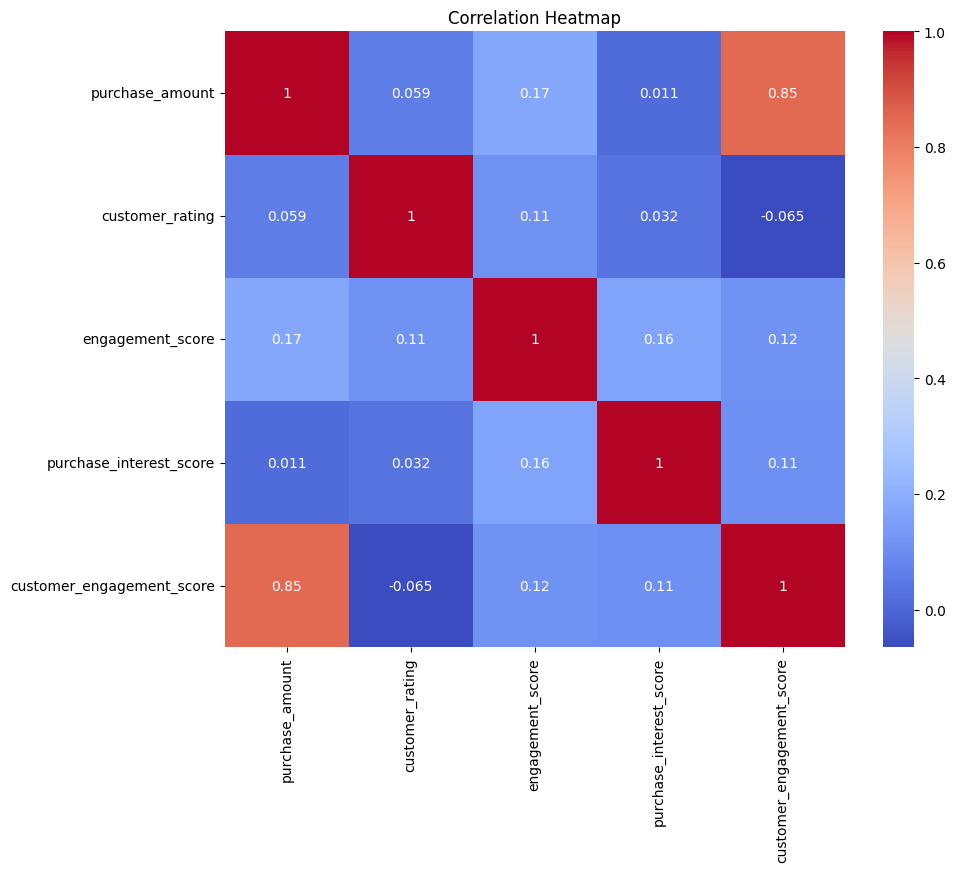


Saved final dataset saved as 'final_dataset_ready_4.csv'
Final dataset size: (323, 7)


In [ ]:
# 3. Feature Selection
# Simple correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[['purchase_amount', 'customer_rating', 'engagement_score', 'purchase_interest_score', 'customer_engagement_score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pick top features (manual selection for simplicity)
top_features = ['purchase_amount', 'customer_rating', 'engagement_score', 'purchase_interest_score', 'customer_engagement_score', 'transaction_id', 'customer_id_legacy']
final_df = data[top_features]

# 4. Save Final Dataset
group_number = '4'
final_df.to_csv(f'final_dataset_ready_{group_number}.csv', index=False)
print(f"\nSaved final dataset saved as 'final_dataset_ready_{group_number}.csv'")
print(f"Final dataset size: {final_df.shape}")